In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This function is to load the batch files
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict


In [ ]:
dict1 = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_1')
dict2 = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_2')
dict3 = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_3')
dict4 = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_4')
dict5 = unpickle('/content/drive/MyDrive/cifar-10-batches-py/data_batch_5')
test_dict = unpickle('/content/drive/MyDrive/cifar-10-batches-py/test_batch')

In [ ]:
import numpy as np
# Concatenate the batches
train_data = np.concatenate([dict1[b'data'], dict2[b'data'], dict3[b'data'], dict4[b'data'], dict5[b'data']])
train_labels = np.concatenate([dict1[b'labels'], dict2[b'labels'], dict3[b'labels'], dict4[b'labels'], dict5[b'labels']])
# Divide by 255.0 to convert the pixel values to the range [0, 1]
train_data = train_data / 255.0
test_data = test_dict[b'data'] / 255.0

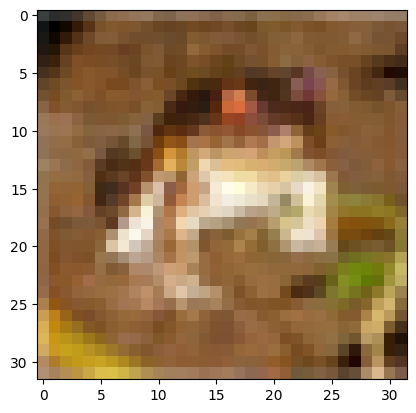

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assume 'dict1' is the loaded data batch
image_index = 0  # the index of the image we want to display
image = np.reshape(dict1[b'data'][image_index], (3, 32, 32))  # reshape
image = np.transpose(image, (1, 2, 0))  # transpose to (height, width, channel)

# Now 'image' contains a 32x32x3 array, which you can display using Matplotlib
plt.imshow(image)
plt.show()

In [ ]:
# Reshaping the data
train_data = train_data.reshape(-1, 3, 32, 32).transpose(0,2,3,1)
test_data = test_data.reshape(-1, 3, 32, 32).transpose(0,2,3,1)

# Label encoding
from keras.utils import to_categorical

train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_dict[b'labels'], num_classes=10)

# **K-NEAREST NEIGHBOR (KNN)**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Reshape the data
train_data_knn = train_data.reshape(train_data.shape[0], -1)
test_data_knn = test_data.reshape(test_data.shape[0], -1)

# Create the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the classifier to the training data
knn.fit(train_data_knn, np.argmax(train_labels, axis=1))

# Make predictions on the test data
predictions = knn.predict(test_data_knn)

# Evaluate the classifier
print(classification_report(np.argmax(test_labels, axis=1), predictions))


              precision    recall  f1-score   support

           0       0.32      0.57      0.41      1000
           1       0.58      0.24      0.34      1000
           2       0.20      0.45      0.28      1000
           3       0.26      0.23      0.24      1000
           4       0.25      0.44      0.32      1000
           5       0.43      0.21      0.28      1000
           6       0.36      0.23      0.28      1000
           7       0.73      0.20      0.31      1000
           8       0.44      0.61      0.51      1000
           9       0.73      0.12      0.21      1000

    accuracy                           0.33     10000
   macro avg       0.43      0.33      0.32     10000
weighted avg       0.43      0.33      0.32     10000



# **Convolutional Neural Networks (CNN)**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# First Convolutional Layer
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second Convolutional Layer
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Fully connected layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_data=(test_data, test_labels))


Epoch 1/10
1563/1563 [==============================] - 20s 6ms/step - loss: 1.5044 - accuracy: 0.4537 - val_loss: 1.1754 - val_accuracy: 0.5870
Epoch 2/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.1659 - accuracy: 0.5865 - val_loss: 1.0440 - val_accuracy: 0.6354
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0523 - accuracy: 0.6291 - val_loss: 0.9160 - val_accuracy: 0.6837
Epoch 4/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9840 - accuracy: 0.6549 - val_loss: 0.8878 - val_accuracy: 0.6960
Epoch 5/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9176 - accuracy: 0.6783 - val_loss: 0.8633 - val_accuracy: 0.7067
Epoch 6/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8794 - accuracy: 0.6901 - val_loss: 0.8243 - val_accuracy: 0.7149
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8313 - accuracy: 0.7061 - val_loss: 0.8321 - val_accuracy

# **Decision Trees (DT)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Reshape the data
train_data_dt = train_data.reshape(train_data.shape[0], -1)
test_data_dt = test_data.reshape(test_data.shape[0], -1)

# Create the decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
dt.fit(train_data_dt, np.argmax(train_labels, axis=1))

# Make predictions on the test data
predictions = dt.predict(test_data_dt)

# Evaluate the classifier
print(classification_report(np.argmax(test_labels, axis=1), predictions))


              precision    recall  f1-score   support

           0       0.33      0.36      0.34      1000
           1       0.29      0.27      0.28      1000
           2       0.21      0.23      0.22      1000
           3       0.20      0.19      0.19      1000
           4       0.21      0.22      0.21      1000
           5       0.21      0.21      0.21      1000
           6       0.28      0.27      0.27      1000
           7       0.27      0.27      0.27      1000
           8       0.37      0.38      0.38      1000
           9       0.30      0.29      0.29      1000

    accuracy                           0.27     10000
   macro avg       0.27      0.27      0.27     10000
weighted avg       0.27      0.27      0.27     10000



# **MLP WITHOUT CONSIDERING FOLDS**

In [ ]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Create the MLP model
model = Sequential()

# Flatten Layer: This will convert our 3D feature maps to 1D feature vectors
model.add(Flatten(input_shape=train_data.shape[1:]))

# Hidden Layer with 512 neurons and 'relu' activation function
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

# Output Layer with 10 neurons (for the 10 classes) and 'softmax' activation function
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_data, train_labels, epochs=20, batch_size=32, validation_data=(test_data, test_labels))


Epoch 1/20
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0850 - accuracy: 0.2201 - val_loss: 1.9047 - val_accuracy: 0.2905
Epoch 2/20
1563/1563 [==============================] - 36s 23ms/step - loss: 2.0107 - accuracy: 0.2431 - val_loss: 1.8615 - val_accuracy: 0.3241
Epoch 3/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.9878 - accuracy: 0.2534 - val_loss: 1.8513 - val_accuracy: 0.3294
Epoch 4/20
1563/1563 [==============================] - 36s 23ms/step - loss: 1.9730 - accuracy: 0.2619 - val_loss: 1.8678 - val_accuracy: 0.3158
Epoch 5/20
1563/1563 [==============================] - 38s 24ms/step - loss: 1.9668 - accuracy: 0.2608 - val_loss: 1.8337 - val_accuracy: 0.3507
Epoch 6/20
1563/1563 [==============================] - 37s 24ms/step - loss: 1.9557 - accuracy: 0.2645 - val_loss: 1.8465 - val_accuracy: 0.3215
Epoch 7/20
1563/1563 [==============================] - 37s 23ms/step - loss: 1.9515 - accuracy: 0.2716 - val_loss: 1.8174 -

# **Multilayer Perceptron (MLP)**

In [ ]:
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout

# Get the original class labels (needed for StratifiedKFold)
train_labels_original = np.argmax(train_labels, axis=1)

n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for train_index, val_index in kfold.split(train_data, train_labels_original):
    # Select the data for this fold
    train_data_fold = train_data[train_index]
    train_labels_fold = train_labels[train_index]
    val_data_fold = train_data[val_index]
    val_labels_fold = train_labels[val_index]

    # Create the MLP model
    model = Sequential()
    model.add(Flatten(input_shape=train_data_fold.shape[1:]))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(train_data_fold, train_labels_fold, epochs=20, batch_size=32, validation_data=(val_data_fold, val_labels_fold))

    # You can then access the model's performance on each fold using the history object...


Epoch 1/20
1250/1250 [==============================] - 29s 22ms/step - loss: 2.1317 - accuracy: 0.2083 - val_loss: 1.9785 - val_accuracy: 0.2864
Epoch 2/20
1250/1250 [==============================] - 27s 22ms/step - loss: 2.0227 - accuracy: 0.2437 - val_loss: 1.9071 - val_accuracy: 0.3134
Epoch 3/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.9978 - accuracy: 0.2510 - val_loss: 1.9001 - val_accuracy: 0.3184
Epoch 4/20
1250/1250 [==============================] - 29s 23ms/step - loss: 1.9862 - accuracy: 0.2552 - val_loss: 1.8945 - val_accuracy: 0.3284
Epoch 5/20
1250/1250 [==============================] - 27s 21ms/step - loss: 1.9841 - accuracy: 0.2522 - val_loss: 1.8797 - val_accuracy: 0.3084
Epoch 6/20
1250/1250 [==============================] - 27s 22ms/step - loss: 1.9691 - accuracy: 0.2602 - val_loss: 1.8500 - val_accuracy: 0.3317
Epoch 7/20
1250/1250 [==============================] - 26s 21ms/step - loss: 1.9630 - accuracy: 0.2622 - val_loss: 1.8428 -

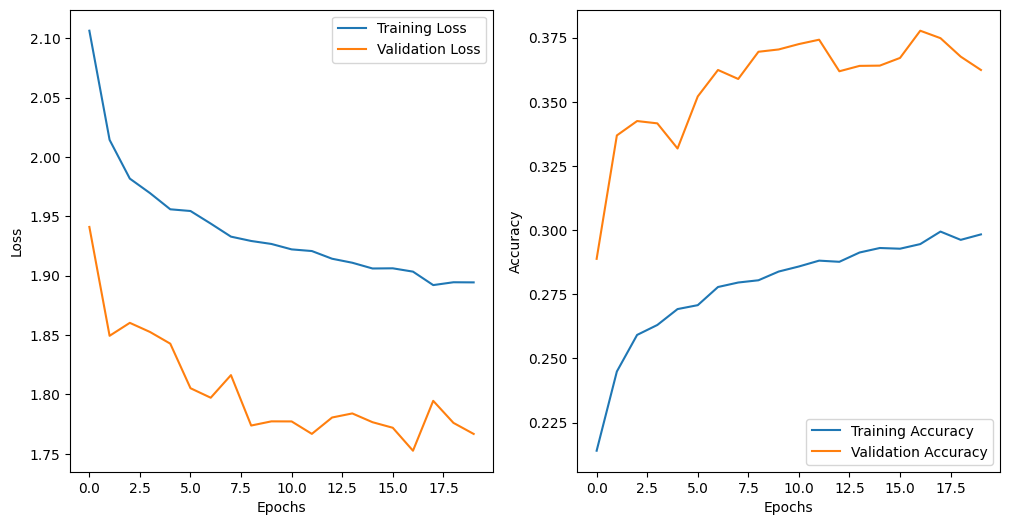

In [ ]:
# Plot the training and validation loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


# **SUPPORT VECTOR MACHINES (SVM)**

In [ ]:
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import numpy as np



# Convert the categorical labels back to integer labels
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)

# Flatten the image data for use with SVM
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)


# Use a subset of the data
subset_size = 25000  # Adjust as needed
train_data_flat = train_data_flat[:subset_size]
train_labels_int = train_labels_int[:subset_size]

n_folds = 5
kfold = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

accuracies = []

for train_index, val_index in kfold.split(train_data_flat, train_labels_int):
    # Select the data for this fold
    train_data_fold = train_data_flat[train_index]
    train_labels_fold = train_labels_int[train_index]
    val_data_fold = train_data_flat[val_index]
    val_labels_fold = train_labels_int[val_index]

    # Create and train the SVM
    clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
    clf.fit(train_data_fold, train_labels_fold)

    # Test the SVM
    val_predictions = clf.predict(val_data_fold)
    accuracy = accuracy_score(val_labels_fold, val_predictions)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print("Average accuracy across folds: ", average_accuracy)


Average accuracy across folds:  0.34756


# **CNN TRAIN**

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

# Define the model
model_cnn = Sequential()

model_cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model_cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

model_cnn.add(Flatten())
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(10, activation='softmax'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.0001),
              loss=categorical_crossentropy,
              metrics=['accuracy'])

# Train the model
history = model_cnn.fit(train_data, train_labels,
                    batch_size=64,
                    epochs=20,
                    validation_data=(test_data, test_labels))


Epoch 1/20
782/782 [==============================] - 8s 9ms/step - loss: 1.8091 - accuracy: 0.3400 - val_loss: 1.5156 - val_accuracy: 0.4502
Epoch 2/20
782/782 [==============================] - 7s 9ms/step - loss: 1.4659 - accuracy: 0.4709 - val_loss: 1.3049 - val_accuracy: 0.5333
Epoch 3/20
782/782 [==============================] - 7s 9ms/step - loss: 1.3205 - accuracy: 0.5294 - val_loss: 1.2026 - val_accuracy: 0.5701
Epoch 4/20
782/782 [==============================] - 7s 9ms/step - loss: 1.2289 - accuracy: 0.5648 - val_loss: 1.1326 - val_accuracy: 0.5986
Epoch 5/20
782/782 [==============================] - 7s 9ms/step - loss: 1.1634 - accuracy: 0.5860 - val_loss: 1.0755 - val_accuracy: 0.6151
Epoch 6/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0950 - accuracy: 0.6126 - val_loss: 1.0278 - val_accuracy: 0.6389
Epoch 7/20
782/782 [==============================] - 7s 9ms/step - loss: 1.0417 - accuracy: 0.6345 - val_loss: 0.9710 - val_accuracy: 0.6599
Epoch 

# **SVM TRAIN**

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Flatten the image data for use with SVM
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Convert the categorical labels back to integer labels
train_labels_int = np.argmax(train_labels, axis=1)
test_labels_int = np.argmax(test_labels, axis=1)

# Create and train the SVM
clf = svm.SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(train_data_flat, train_labels_int)

# Test the SVM
test_predictions = clf.predict(test_data_flat)
accuracy = accuracy_score(test_labels_int, test_predictions)

print("Accuracy: ", accuracy)


Accuracy:  0.375


# **MLP TRAIN**

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Define the model
model_mlp = Sequential()

# Flatten layer to flatten out the input shape
model_mlp.add(Flatten(input_shape=(32, 32, 3)))

# First hidden layer with 512 nodes
model_mlp.add(Dense(512, activation='relu'))

# Second hidden layer with 512 nodes
model_mlp.add(Dense(512, activation='relu'))

# Output layer with 10 nodes (one for each class)
model_mlp.add(Dense(10, activation='softmax'))

# Compile the model
model_mlp.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

# Train the model
history = model_mlp.fit(train_data, train_labels,
                    validation_data=(test_data, test_labels),
                    epochs=10,
                    batch_size=32)

# Here we are training for 10 epochs with a batch size of 32.
# The model's performance is evaluated on the test set at the end of each epoch.


Epoch 1/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.8451 - accuracy: 0.3313 - val_loss: 1.6945 - val_accuracy: 0.3875
Epoch 2/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.6623 - accuracy: 0.4021 - val_loss: 1.5838 - val_accuracy: 0.4320
Epoch 3/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5936 - accuracy: 0.4271 - val_loss: 1.5701 - val_accuracy: 0.4388
Epoch 4/10
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5477 - accuracy: 0.4449 - val_loss: 1.5915 - val_accuracy: 0.4308
Epoch 5/10
1563/1563 [==============================] - 29s 19ms/step - loss: 1.5104 - accuracy: 0.4590 - val_loss: 1.5504 - val_accuracy: 0.4395
Epoch 6/10
1563/1563 [==============================] - 29s 18ms/step - loss: 1.4805 - accuracy: 0.4675 - val_loss: 1.4943 - val_accuracy: 0.4695
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4581 - accuracy: 0.4780 - val_loss: 1.5266 -

# **TEST**

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model_cnn.evaluate(test_data, test_labels, verbose=0)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


Test Loss: 0.7231283783912659
Test Accuracy: 0.7530999779701233
